<a href="https://colab.research.google.com/github/naku2/smartFactory/blob/main/MVtech_leenakkyu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기 & 전처리

Import

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import math
from tensorflow import keras
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
#good images 불러온 후 전처리
input_folder = '/content/drive/MyDrive/SK/transistor/train/good'
output_folder = '/content/drive/MyDrive/SK/transistor/train/good_scaled'

image_files = os.listdir(input_folder)

for image_file in image_files:
  image_path = os.path.join(input_folder, image_file)

  image = Image.open(image_path)

  resized_image = image.resize((224, 224))

  image_array = np.array(resized_image)

  scaled_image_array = image_array / 255.0

  output_path = os.path.join(output_folder, image_file)

  np.save(output_path, scaled_image_array)

  image.close()

In [ ]:
#output_files 함께 선언
output_files = os.listdir(output_folder)

In [ ]:
#data 확인
scaled_image_array.dtype

dtype('float64')

## 데이터 라벨링

In [ ]:
for output_file in output_files:
  print(output_file)

010.png.npy
020.png.npy
006.png.npy
014.png.npy
031.png.npy
028.png.npy
033.png.npy
034.png.npy
002.png.npy
017.png.npy
023.png.npy
004.png.npy
032.png.npy
008.png.npy
005.png.npy
035.png.npy
019.png.npy
025.png.npy
036.png.npy
029.png.npy
011.png.npy
021.png.npy
000.png.npy
003.png.npy
001.png.npy
016.png.npy
039.png.npy
038.png.npy
026.png.npy
037.png.npy
015.png.npy
009.png.npy
022.png.npy
024.png.npy
018.png.npy
027.png.npy
013.png.npy
030.png.npy
007.png.npy
012.png.npy
055.png.npy
075.png.npy
060.png.npy
099.png.npy
071.png.npy
062.png.npy
083.png.npy
079.png.npy
111.png.npy
105.png.npy
053.png.npy
089.png.npy
051.png.npy
047.png.npy
091.png.npy
101.png.npy
104.png.npy
057.png.npy
063.png.npy
068.png.npy
056.png.npy
084.png.npy
058.png.npy
078.png.npy
113.png.npy
082.png.npy
043.png.npy
102.png.npy
112.png.npy
065.png.npy
054.png.npy
103.png.npy
059.png.npy
052.png.npy
085.png.npy
086.png.npy
046.png.npy
110.png.npy
092.png.npy
044.png.npy
088.png.npy
080.png.npy
050.png.npy
109.

In [ ]:
# 0 = 'good'으로 라벨링
import csv

label_file = "label_files.csv"

fieldnames = ["filename", "label"]

label_data = []

for output_file in output_files:
  label_data.append({"filename": output_file, "label": int(0)})

with open(label_file, 'w', newline='') as f:
  writer = csv.DictWriter(f, fieldnames=fieldnames)
  writer.writeheader()
  writer.writerows(label_data)


In [ ]:
print(label_data)

[{'filename': '010.png.npy', 'label': 0}, {'filename': '020.png.npy', 'label': 0}, {'filename': '006.png.npy', 'label': 0}, {'filename': '014.png.npy', 'label': 0}, {'filename': '031.png.npy', 'label': 0}, {'filename': '028.png.npy', 'label': 0}, {'filename': '033.png.npy', 'label': 0}, {'filename': '034.png.npy', 'label': 0}, {'filename': '002.png.npy', 'label': 0}, {'filename': '017.png.npy', 'label': 0}, {'filename': '023.png.npy', 'label': 0}, {'filename': '004.png.npy', 'label': 0}, {'filename': '032.png.npy', 'label': 0}, {'filename': '008.png.npy', 'label': 0}, {'filename': '005.png.npy', 'label': 0}, {'filename': '035.png.npy', 'label': 0}, {'filename': '019.png.npy', 'label': 0}, {'filename': '025.png.npy', 'label': 0}, {'filename': '036.png.npy', 'label': 0}, {'filename': '029.png.npy', 'label': 0}, {'filename': '011.png.npy', 'label': 0}, {'filename': '021.png.npy', 'label': 0}, {'filename': '000.png.npy', 'label': 0}, {'filename': '003.png.npy', 'label': 0}, {'filename': '0

## bad images 편집

In [ ]:
#파일명 중복으로 인한 이름 변경
folder_path = '/content/drive/MyDrive/SK/transistor/test/bent_lead'
extension = '.png'
prefix = 'bent_lead_'

for i, filename in enumerate(os.listdir(folder_path)):
  new_filename = f'{prefix}{i+1:03d}{extension}'

  old_path = os.path.join(folder_path, filename)
  new_path = os.path.join(folder_path, new_filename)

  os.rename(old_path, new_path)


folder_path = '/content/drive/MyDrive/SK/transistor/test/cut_lead'
extension = '.png'
prefix = 'cut_lead_'

for i, filename in enumerate(os.listdir(folder_path)):
  new_filename = f'{prefix}{i+1:03d}{extension}'

  old_path = os.path.join(folder_path, filename)
  new_path = os.path.join(folder_path, new_filename)

  os.rename(old_path, new_path)


folder_path = '/content/drive/MyDrive/SK/transistor/test/damaged_case'
extension = '.png'
prefix = 'damaged_'

for i, filename in enumerate(os.listdir(folder_path)):
  new_filename = f'{prefix}{i+1:03d}{extension}'

  old_path = os.path.join(folder_path, filename)
  new_path = os.path.join(folder_path, new_filename)

  os.rename(old_path, new_path)


folder_path = '/content/drive/MyDrive/SK/transistor/test/misplaced'
extension = '.png'
prefix = 'misplaced_'

for i, filename in enumerate(os.listdir(folder_path)):
  new_filename = f'{prefix}{i+1:03d}{extension}'

  old_path = os.path.join(folder_path, filename)
  new_path = os.path.join(folder_path, new_filename)

  os.rename(old_path, new_path)


bad images 전처리 후 라벨링

In [ ]:
input_folder = '/content/drive/MyDrive/SK/transistor/test/bent_lead'
output_folder = '/content/drive/MyDrive/SK/transistor/train/bent_lead_scaled'

image_files = os.listdir(input_folder)

for image_file in image_files:
  image_path = os.path.join(input_folder, image_file)

  image = Image.open(image_path)

  resized_image = image.resize((224, 224))

  image_array = np.array(resized_image)

  scaled_image_array = image_array / 255.0

  output_path = os.path.join(output_folder, image_file)

  np.save(output_path, scaled_image_array)

  image.close()

In [ ]:
input_folder = '/content/drive/MyDrive/SK/transistor/test/cut_lead'
output_folder = '/content/drive/MyDrive/SK/transistor/train/cut_lead_scaled'

image_files = os.listdir(input_folder)

for image_file in image_files:
  image_path = os.path.join(input_folder, image_file)

  image = Image.open(image_path)

  resized_image = image.resize((224, 224))

  image_array = np.array(resized_image)

  scaled_image_array = image_array / 255.0

  output_path = os.path.join(output_folder, image_file)

  np.save(output_path, scaled_image_array)

  image.close()

In [ ]:
input_folder = '/content/drive/MyDrive/SK/transistor/test/damaged_case'
output_folder = '/content/drive/MyDrive/SK/transistor/train/damaged_case_scaled'

image_files = os.listdir(input_folder)

for image_file in image_files:
  image_path = os.path.join(input_folder, image_file)

  image = Image.open(image_path)

  resized_image = image.resize((224, 224))

  image_array = np.array(resized_image)

  scaled_image_array = image_array / 255.0

  output_path = os.path.join(output_folder, image_file)

  np.save(output_path, scaled_image_array)

  image.close()

In [ ]:
input_folder = '/content/drive/MyDrive/SK/transistor/test/misplaced'
output_folder = '/content/drive/MyDrive/SK/transistor/train/misplaced_scaled'

image_files = os.listdir(input_folder)

for image_file in image_files:
  image_path = os.path.join(input_folder, image_file)

  image = Image.open(image_path)

  resized_image = image.resize((224, 224))

  image_array = np.array(resized_image)

  scaled_image_array = image_array / 255.0

  output_path = os.path.join(output_folder, image_file)

  np.save(output_path, scaled_image_array)

  image.close()

전처리 파일들 한 폴더에 취합

In [ ]:
import shutil

source_folder = '/content/drive/MyDrive/SK/transistor/train/bent_lead_scaled'
destination_folder = '/content/drive/MyDrive/SK/transistor/train/bad_scaled'

for filename in os.listdir(source_folder):
  source_path = os.path.join(source_folder, filename)
  destination_path = os.path.join(destination_folder, filename)
  shutil.copy(source_path, destination_path)

In [ ]:
source_folder = '/content/drive/MyDrive/SK/transistor/train/cut_lead_scaled'

for filename in os.listdir(source_folder):
  source_path = os.path.join(source_folder, filename)
  destination_path = os.path.join(destination_folder, filename)
  shutil.copy(source_path, destination_path)

source_folder = '/content/drive/MyDrive/SK/transistor/train/damaged_case_scaled'

for filename in os.listdir(source_folder):
  source_path = os.path.join(source_folder, filename)
  destination_path = os.path.join(destination_folder, filename)
  shutil.copy(source_path, destination_path)

source_folder = '/content/drive/MyDrive/SK/transistor/train/misplaced_scaled'

for filename in os.listdir(source_folder):
  source_path = os.path.join(source_folder, filename)
  destination_path = os.path.join(destination_folder, filename)
  shutil.copy(source_path, destination_path)

bad images 라벨링

In [ ]:
label_file

'label_files.csv'

In [ ]:
label_data

[{'filename': '010.png.npy', 'label': 0},
 {'filename': '020.png.npy', 'label': 0},
 {'filename': '006.png.npy', 'label': 0},
 {'filename': '014.png.npy', 'label': 0},
 {'filename': '031.png.npy', 'label': 0},
 {'filename': '028.png.npy', 'label': 0},
 {'filename': '033.png.npy', 'label': 0},
 {'filename': '034.png.npy', 'label': 0},
 {'filename': '002.png.npy', 'label': 0},
 {'filename': '017.png.npy', 'label': 0},
 {'filename': '023.png.npy', 'label': 0},
 {'filename': '004.png.npy', 'label': 0},
 {'filename': '032.png.npy', 'label': 0},
 {'filename': '008.png.npy', 'label': 0},
 {'filename': '005.png.npy', 'label': 0},
 {'filename': '035.png.npy', 'label': 0},
 {'filename': '019.png.npy', 'label': 0},
 {'filename': '025.png.npy', 'label': 0},
 {'filename': '036.png.npy', 'label': 0},
 {'filename': '029.png.npy', 'label': 0},
 {'filename': '011.png.npy', 'label': 0},
 {'filename': '021.png.npy', 'label': 0},
 {'filename': '000.png.npy', 'label': 0},
 {'filename': '003.png.npy', 'labe

In [ ]:
output_folder = '/content/drive/MyDrive/SK/transistor/train/bad_scaled'

output_files = os.listdir(output_folder)


for output_file in output_files:
  label_data.append({"filename": output_file, "label": int(1)})

  with open(label_file, 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(label_data)

라벨링 파일 취합

In [ ]:
#good images & bad images 취합
source_folder = '/content/drive/MyDrive/SK/transistor/train/good_scaled'  # 복사할 파일들이 있는 폴더 경로
destination_folder = '/content/drive/MyDrive/SK/transistor/train/test_scaled'  # 복사한 파일들을 저장할 폴더 경로

# 대상 폴더가 없으면 생성
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# 폴더 내의 파일들을 복사
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    shutil.copy(source_path, destination_path)

source_folder = '/content/drive/MyDrive/SK/transistor/train/bad_scaled'  # 복사할 파일들이 있는 폴더 경로

# 대상 폴더가 없으면 생성
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# 폴더 내의 파일들을 복사
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    shutil.copy(source_path, destination_path)

## 모델 생성 및 학습

In [ ]:
train = pd.read_csv('/content/label_files.csv')

In [ ]:
train.shape

(253, 2)

In [ ]:
train['filename'].shape

(253,)

In [ ]:
#csv파일에는 이미지 관련 데이터가 따로 들어가지 않는다. 따라서 파일명에 따른 경로를 따로 지정해줘야함

train data 생성

In [ ]:
from keras.utils import to_categorical

label_file = pd.read_csv('/content/label_files.csv')

x = []
y = []
for i in range(len(label_file)):
  file_path = label_file['filename'][i]
  # print(type(file_path))
  label = label_file['label'][i]

  loaded_data = np.load('/content/drive/MyDrive/SK/transistor/train/test_scaled/' + file_path)
  x.append(loaded_data)
  y.append(label)

x = np.array(x)
y = np.array(y)

y = to_categorical(y)

In [ ]:
print(x)

[[[[0.55294118 0.38823529 0.3372549 ]
   [0.55294118 0.39215686 0.3372549 ]
   [0.55294118 0.38823529 0.33333333]
   ...
   [0.1372549  0.09411765 0.09411765]
   [0.34901961 0.21960784 0.2       ]
   [0.6745098  0.4627451  0.38431373]]

  [[0.55294118 0.38823529 0.3372549 ]
   [0.55686275 0.39607843 0.3372549 ]
   [0.55686275 0.38823529 0.33333333]
   ...
   [0.14117647 0.09803922 0.09411765]
   [0.30980392 0.19607843 0.17647059]
   [0.61960784 0.42352941 0.35686275]]

  [[0.54509804 0.38823529 0.3372549 ]
   [0.54901961 0.38823529 0.33333333]
   [0.55294118 0.39215686 0.3372549 ]
   ...
   [0.14901961 0.09803922 0.09411765]
   [0.30588235 0.19607843 0.17254902]
   [0.58039216 0.40392157 0.34509804]]

  ...

  [[0.5254902  0.38039216 0.34117647]
   [0.51764706 0.37254902 0.32941176]
   [0.5254902  0.37647059 0.33333333]
   ...
   [0.58823529 0.41176471 0.35294118]
   [0.59215686 0.41176471 0.35686275]
   [0.59215686 0.41568627 0.36862745]]

  [[0.5254902  0.37647059 0.3372549 ]
   [0.5

모델 생성

In [ ]:
from keras.applications import ResNet50
from keras.layers import GlobalAveragePooling2D
num_classes = 2

# # Sequential 모델 구성
# model = tf.keras.Sequential()

# # 입력 레이어
# model.add(Input(shape=(512, 512, 3)))

# # 컨볼루션 레이어
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# # 플래튼(Flatten) 레이어
# model.add(Flatten())

# # 완전 연결(Dense) 레이어
# model.add(Dense(64, activation='relu'))

# # 출력 레이어
# model.add(Dense(num_classes, activation='softmax'))

# # 모델 컴파일
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # 모델 요약 정보 출력
# model.summary()

# 사전 훈련된 ResNet50 모델 로드
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 분류 계층 추가
model = tf.keras.Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

# 기반 모델 동결
base_model.trainable = False

# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
x.shape

(253, 224, 224, 3)

In [ ]:
#Resnet50 인풋 라벨 편집
y = y.astype(int)

학습

In [ ]:
history = model.fit(x, y, validation_split=0.2, epochs=50, verbose=1, batch_size=8)

Epoch 1/50
26/26 [==============================] - 75s 3s/step - loss: 0.2625 - accuracy: 0.8812 - val_loss: 2.9773 - val_accuracy: 0.2157
Epoch 2/50
26/26 [==============================] - 73s 3s/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 3.7725 - val_accuracy: 0.2157
Epoch 3/50
26/26 [==============================] - 47s 2s/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 4.0511 - val_accuracy: 0.2157
Epoch 4/50
26/26 [==============================] - 49s 2s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 4.2503 - val_accuracy: 0.2157
Epoch 5/50
26/26 [==============================] - 48s 2s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 4.4238 - val_accuracy: 0.2157
Epoch 6/50
26/26 [==============================] - 62s 2s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 4.5787 - val_accuracy: 0.2157
Epoch 7/50
26/26 [==============================] - 47s 2s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 4.7184 - val_accuracy: 0.2157
Epoch 8/50
26/26 [==

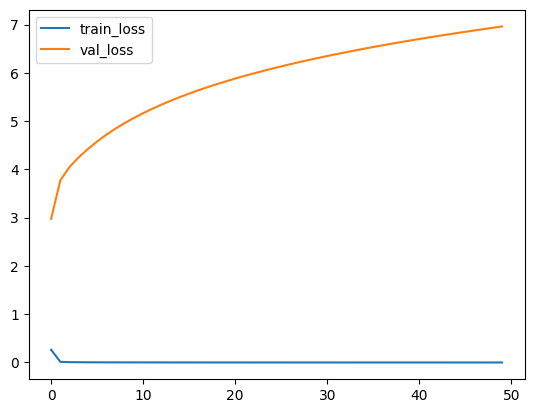

In [ ]:
#결과 확인
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## 모델 피드백

데이터 수 증강

In [ ]:
#rotated_data = np.rot90(x)

#np.save('rotated_data.npy', rotated_data)
#np.save('rotated_data_label.npy', y)
#(640, 253, 640, 3)

flipped_data_lr = np.flip(x, axis=1)

np.save('flipped_data_lr.npy', flipped_data_lr)
np.save('flipped_data_lr_label.npy', y)

flipped_data_ud = np.flip(x, axis=0)

np.save('flipped_data_ud.npy', flipped_data_ud)
np.save('flipped_data_ud_label.npy', y)

mean = 0
stddev = 0.05
noise = np.random.normal(mean, stddev, x.shape)
noisy_data = x + noise
np.save('noisy_data.npy', noisy_data)
np.save('noisy_data_label.npy', y)

모델 재훈련

In [ ]:
flipped_data_lr = np.load('flipped_data_lr.npy')
flipped_data_ud = np.load('flipped_data_ud.npy')
noisy_data = np.load('noisy_data.npy')
flipped_data_lr_label = np.load('flipped_data_lr_label.npy')
flipped_data_ud_label = np.load('flipped_data_ud_label.npy')
noisy_data_label = np.load('noisy_data_label.npy')

total_x = np.concatenate((x, flipped_data_lr, flipped_data_ud, noisy_data), axis=0)
total_y = np.concatenate((y, flipped_data_lr_label, flipped_data_ud_label, noisy_data_label), axis=0)

history = model.fit(total_x, total_y, validation_split=0.2, epochs=50, verbose=1, batch_size=8)

Epoch 1/50
102/102 [==============================] - 192s 2s/step - loss: 0.5442 - accuracy: 0.8517 - val_loss: 0.5381 - val_accuracy: 0.8030
Epoch 2/50
102/102 [==============================] - 191s 2s/step - loss: 0.4236 - accuracy: 0.8517 - val_loss: 0.5023 - val_accuracy: 0.8030
Epoch 3/50
102/102 [==============================] - 186s 2s/step - loss: 0.4224 - accuracy: 0.8517 - val_loss: 0.4928 - val_accuracy: 0.8030
Epoch 4/50
102/102 [==============================] - 191s 2s/step - loss: 0.4180 - accuracy: 0.8517 - val_loss: 0.5283 - val_accuracy: 0.8030
Epoch 5/50
102/102 [==============================] - 191s 2s/step - loss: 0.4270 - accuracy: 0.8517 - val_loss: 0.5364 - val_accuracy: 0.8030
Epoch 6/50
102/102 [==============================] - 190s 2s/step - loss: 0.4171 - accuracy: 0.8517 - val_loss: 0.5102 - val_accuracy: 0.8030
Epoch 7/50
102/102 [==============================] - 191s 2s/step - loss: 0.4177 - accuracy: 0.8517 - val_loss: 0.4881 - val_accuracy: 0.8030

KeyboardInterrupt: ignored

결과 확인

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

epochs 증가

In [ ]:
history = model.fit(total_x, total_y, validation_split=0.2, epochs=100, verbose=1, batch_size=8)

데이터 확인 및 저장

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
model.save('transistor_cnn.h5')